In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/spotify.csv")

In [2]:
# 1. Data Quality Check
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())

# Handle missing values (if any)
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows: 27


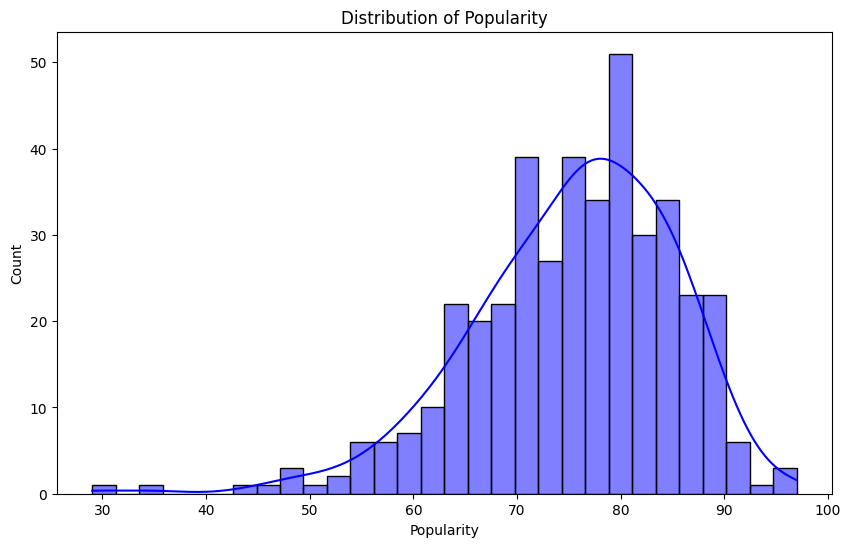

In [3]:
# 2. Distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True, color='blue')
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

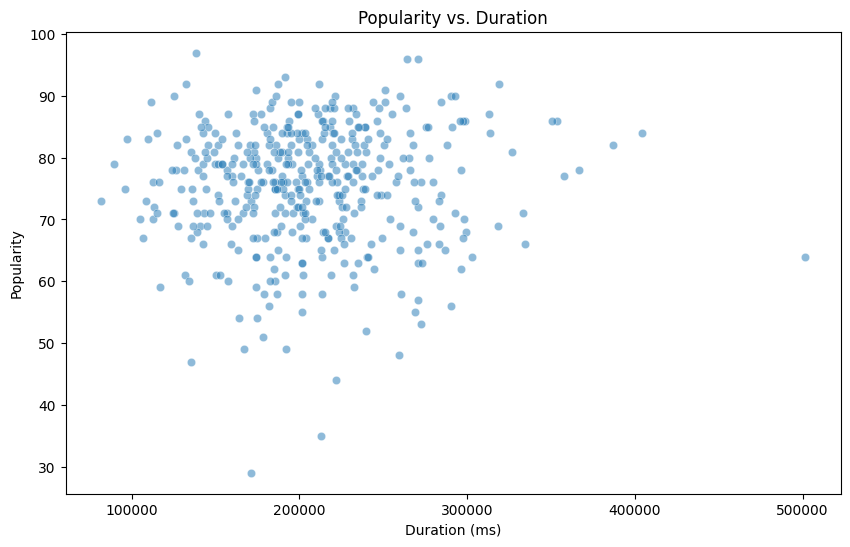

In [4]:
# 3. Relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.5)
plt.title("Popularity vs. Duration")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

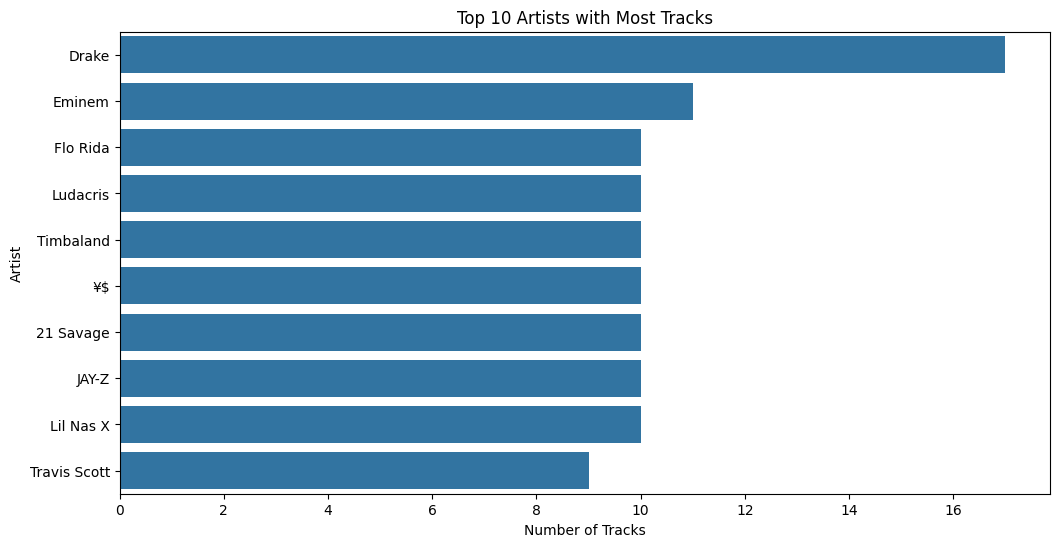

In [5]:
# 4. Artist with the highest number of tracks
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Artist'], order=df['Artist'].value_counts().index[:10])
plt.title("Top 10 Artists with Most Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [6]:
# 5. Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)

Top 5 Least Popular Tracks:
              Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


In [7]:
# 6. Top 5 most popular artists and their average popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("Top 5 Most Popular Artists (Average Popularity):\n", top_5_artists)

Top 5 Most Popular Artists (Average Popularity):
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [8]:
# 7. Most popular track for each of the top 5 artists
popular_tracks = df[df['Artist'].isin(top_5_artists.index)].groupby('Artist').apply(lambda x: x.nlargest(1, 'Popularity'))[['Track Name']]
print("Most Popular Track for Top 5 Artists:\n", popular_tracks)

Most Popular Track for Top 5 Artists:
                                     Track Name
Artist                                        
David Guetta 200            Baby Don't Hurt Me
Travis Scott 30     FE!N (feat. Playboi Carti)
Trueno       241  Mamichula - con Nicki Nicole
cassö        140                         Prada
¥$           260                      CARNIVAL


<ipython-input-8-52bc8ab388d0>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  popular_tracks = df[df['Artist'].isin(top_5_artists.index)].groupby('Artist').apply(lambda x: x.nlargest(1, 'Popularity'))[['Track Name']]


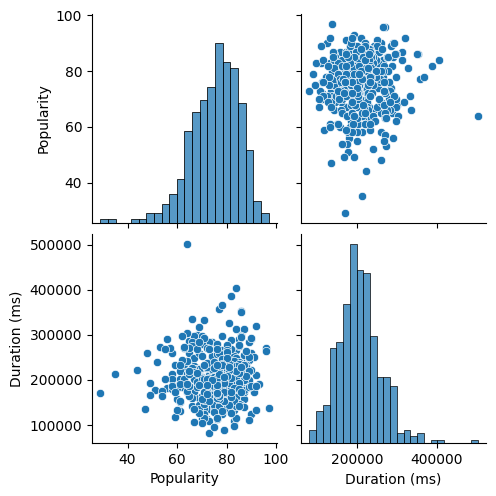

In [9]:
# 8. Pair plot for numerical relationships
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

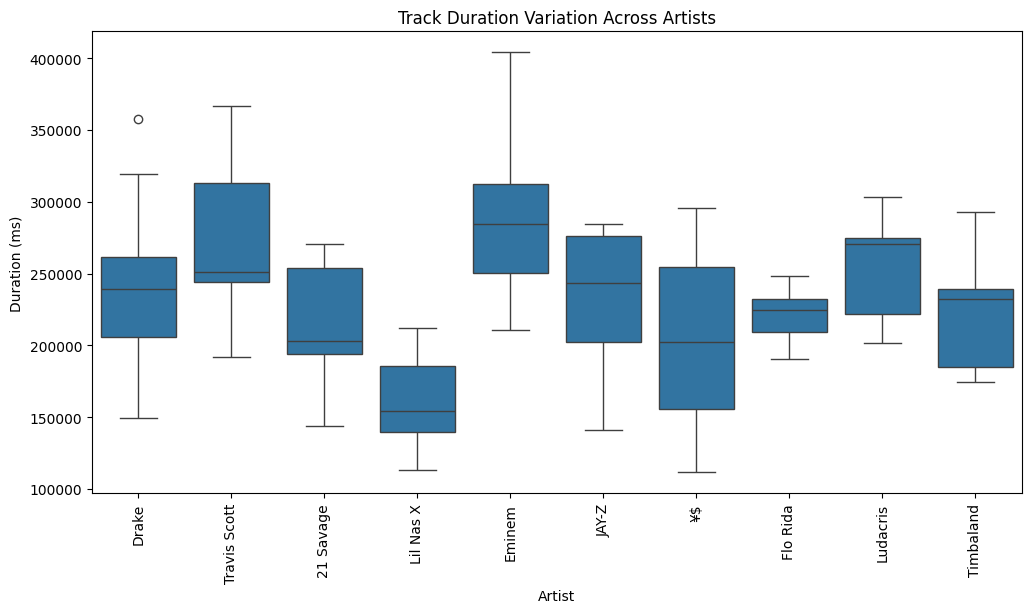

In [10]:
# 9. Variation of track duration across artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(df['Artist'].value_counts().index[:10])])
plt.xticks(rotation=90)
plt.title("Track Duration Variation Across Artists")
plt.show()

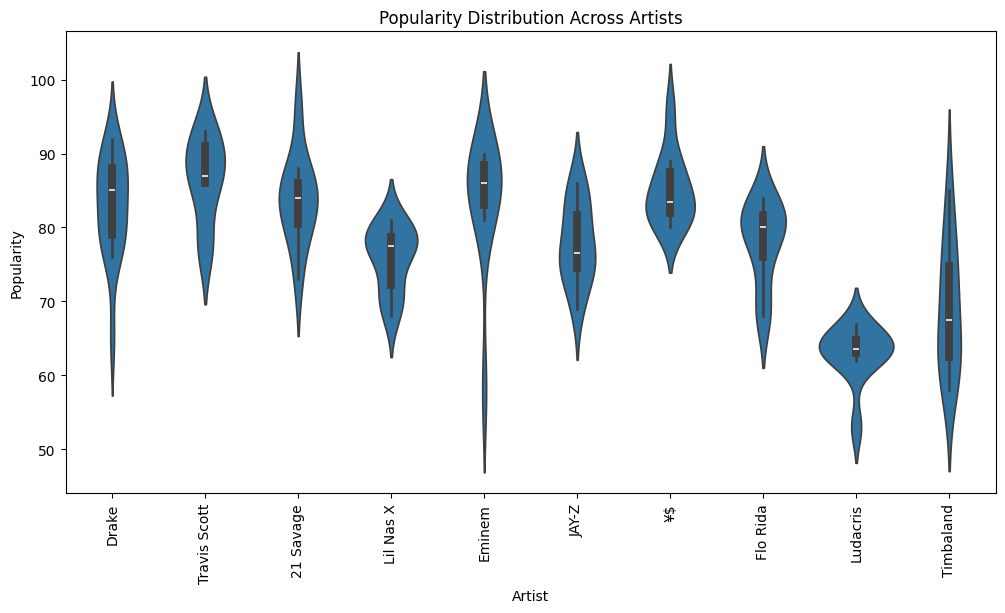

In [11]:
# 10. Distribution of track popularity across artists
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(df['Artist'].value_counts().index[:10])])
plt.xticks(rotation=90)
plt.title("Popularity Distribution Across Artists")
plt.show()